In [16]:
!pip install "gymnasium[mujoco]"
!pip install mpi4py

In [17]:
import os
import subprocess
import torch
from matplotlib import pyplot as plt
import gymnasium as gym
import numpy as np
import pandas as pd

In [18]:
env_file = 'model_downloader.py'
env_url = "https://raw.githubusercontent.com/alibaniasad1999/master-thesis/main/Code/Python/utils/model_downloader.py"

if not os.path.isfile(env_file):
    print(f"Downloading {env_file} ...")
    subprocess.run(
        ['wget', '-q', '-O', env_file, env_url],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.DEVNULL
    )
    print(f"{env_file} downloaded.")
else:
    print(f"{env_file} already exists.")

from model_downloader import download_file, download_everything

trajectory = download_everything('ddpg, TBP, zs_ddpg, models, zs_models')

from Zero_Sum_DDPG import setup_logger_kwargs, MLPActorCritic, DG_DDPG
from DDPG import DDPG
import TBP
from TBP import ThreeBodyEnv

model_downloader.py already exists.
trajectory.csv already exists.
Trajectory head:
   0.87018  -0.059444  0  -0.010472  -0.17514  0.1
0  0.87018  -0.059540  0  -0.010536  -0.17494    0
1  0.87017  -0.059636  0  -0.010600  -0.17474    0
2  0.87017  -0.059732  0  -0.010664  -0.17454    0
3  0.87016  -0.059828  0  -0.010728  -0.17434    0
4  0.87015  -0.059924  0  -0.010793  -0.17414    0
Data shape: (9999, 6)
TBP.py already exists.
DDPG.py already exists.
Zero_Sum_DDPG.py already exists.
Directory 'model' already exists and is not empty.
model/actor_cuda.pth already exists.
model/q_cuda.pth already exists.
Directory 'model_zs' already exists and is not empty.
model_zs/actor_cuda.pth already exists.
model_zs/q_cuda.pth already exists.
model_zs/q_2_cuda.pth already exists.
model_zs/actor_2_cuda.pth already exists.


In [19]:
# Common hyperparameters and settings
hid = 32
l = 2
seed = 0
epochs = 50
exp_name = 'ddpg'
steps_per_epoch = 30000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ac_kwargs = dict(hidden_sizes=[hid] * l)
logger_kwargs = setup_logger_kwargs(exp_name, seed)


In [20]:
# Helper function to create the environment
def make_env(error_range=0.01, final_range=0.001):
    return ThreeBodyEnv(trajectory, error_range=error_range, final_range=final_range)

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/DDPG/initial_condition_shift/data/ddpg/ddpg_s0/progress.txt
Saving config:

{
    "ac_kwargs_":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_dim":	2,
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "device":	"cpu",
    "env_fn":	"make_env",
    "epochs_":	50,
    "exp_name":	"ddpg",
    "first_player_epoch":	50,
    "gamma_":	0.99,
    "logger_kwargs_":	{
        "exp_name":	"ddpg",
        "output_dir":	"/Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/DDPG/initial_condition_shift/data/ddpg/ddpg_s0"
    },
    "max_ep_len":	6000,
    "num_test_episodes":	10,
    "obs_dim":	[
        4
    ],
    "p":	"Parameter containing:\ntensor([0.1690])",
    "pi_lr":	0.001,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed_":	0,
    "self":	{
        "<Zero_Sum_DDPG

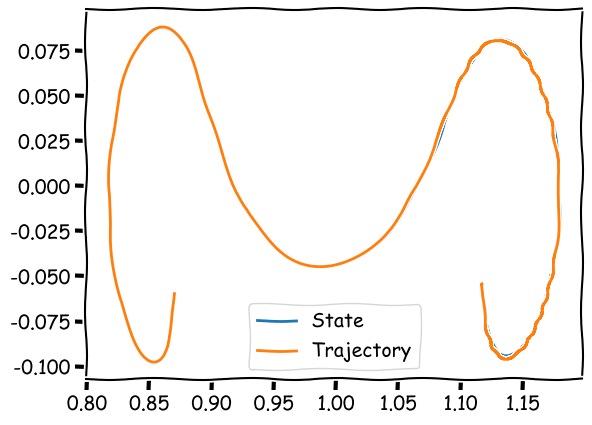

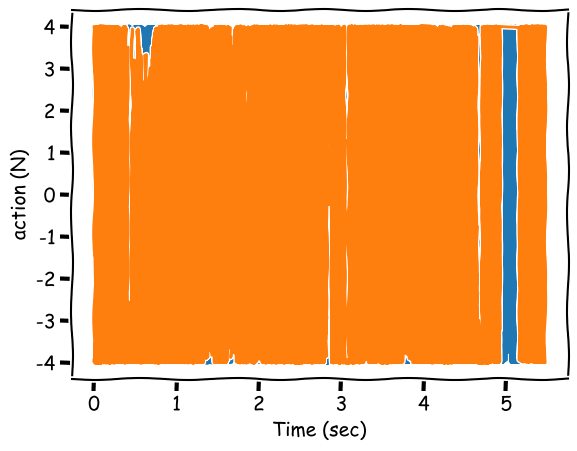

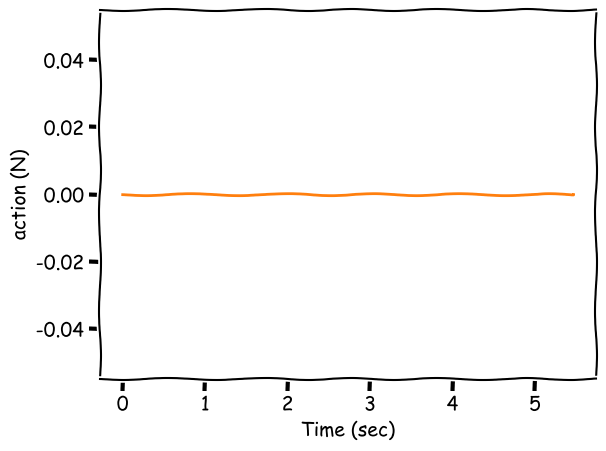

In [21]:
ddpg_zs = DG_DDPG(
    env_fn=make_env,
    actor_critic=MLPActorCritic,
    ac_kwargs_=ac_kwargs,
    seed_=seed,
    steps_per_epoch=steps_per_epoch,
    epochs_=epochs,
    logger_kwargs_=logger_kwargs,
    device=device,
    batch_size=1024,
    start_steps=5000,
    update_after=1000,
    update_every=2000,
    first_player_epoch=50
)

ddpg_zs.load(filepath='model_zs/', from_device_to_load='cuda')
ddpg_zs.test(fun_mode=True)
ddpg_zs.env.second_player = False

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/DDPG/initial_condition_shift/data/ddpg/ddpg_s0/progress.txt
Saving config:

{
    "ac_kwargs_":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_dim":	2,
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "device_":	"cpu",
    "env_fn":	"make_env",
    "epochs_":	50,
    "exp_name":	"ddpg",
    "gamma_":	0.99,
    "logger_kwargs_":	{
        "exp_name":	"ddpg",
        "output_dir":	"/Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/DDPG/initial_condition_shift/data/ddpg/ddpg_s0"
    },
    "max_ep_len":	6000,
    "num_test_episodes":	10,
    "obs_dim":	[
        4
    ],
    "p":	"Parameter containing:\ntensor([-0.1749])",
    "pi_lr":	0.001,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed_":	0,
    "self":	{
        "<DDPG.DDPG object at 0x1682d2910>":	{
    

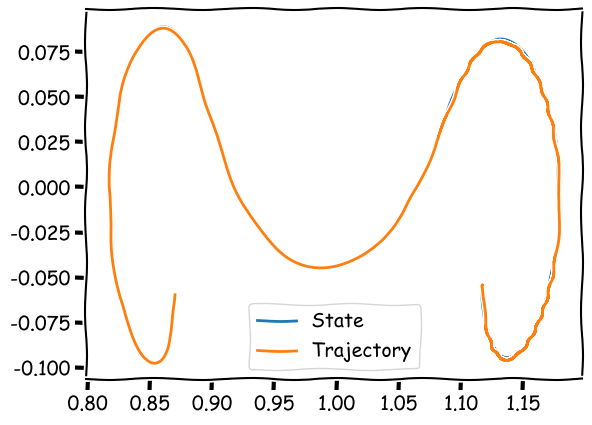

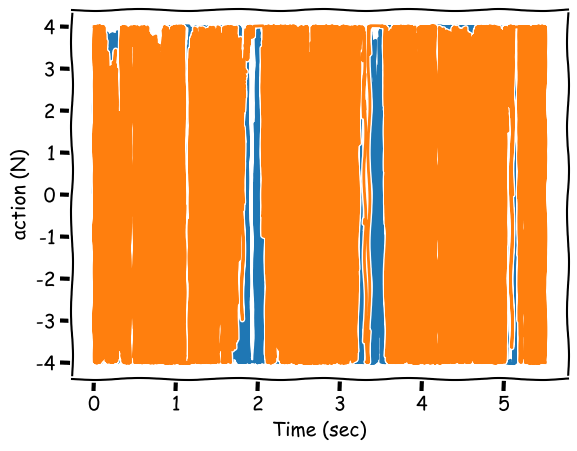

In [22]:
ddpg = DDPG(
    env_fn=make_env,
    actor_critic=MLPActorCritic,
    ac_kwargs_=ac_kwargs,
    seed_=seed,
    steps_per_epoch=steps_per_epoch,
    epochs_=epochs,
    logger_kwargs_=logger_kwargs,
    device_=device,
    batch_size=1024,
    start_steps=5000,
    update_after=1000,
    update_every=2000
)

ddpg.load(from_device_to_load='cuda')
ddpg.test(fun_mode=True)
ddpg.env.second_player = False

In [23]:
class InitialConditionShiftWrapper(gym.Wrapper):
    """
    Gym environment wrapper that:
      - Adds a random Gaussian shift to the initial condition (obs) at the beginning of each episode.
      - Adds continuous observation noise at every step.
    This wrapper supports the Gymnasium API where:
      - reset returns: (observation, info)
      - step returns: (observation, reward, terminated, truncated, info)
    """

    def __init__(self, env, shift_std=0.05, obs_noise_std=0.01):
        """
        :param env:               The original environment.
        :param shift_std:         Standard deviation for shifting the initial state.
        :param obs_noise_std:     Standard deviation for adding noise to observations at each step.
        """
        super(InitialConditionShiftWrapper, self).__init__(env)
        self.shift_std = shift_std      # How much we shift the initial condition
        self.obs_noise_std = obs_noise_std  # How much noise to add to observations each step

    def reset(self, **kwargs):
        """
        Perturbs the initial state at the beginning of each episode to simulate an initial condition shift,
        then also applies observation noise.
        """
        result = self.env.reset(**kwargs)
        if isinstance(result, tuple):
            obs, info = result
        else:
            obs = result
            info = {}

        # Shift the initial condition (perturb the starting state).
        obs = self._shift_initial_condition(obs)
        # Also apply observation noise right after shifting.
        obs = self._apply_obs_noise(obs)

        return (obs, info) if isinstance(result, tuple) else obs

    def step(self, action):
        """
        Takes a step in the environment, then adds noise to the observation.
        """
        obs, reward, terminated, truncated, info = self.env.step(action)
        # Apply observation noise
        obs = self._apply_obs_noise(obs)
        return obs, reward, terminated, truncated, info

    def _shift_initial_condition(self, initial_state):
        """
        Shifts the initial condition by adding Gaussian noise to the initial state.
        """
        state = np.array(initial_state, dtype=np.float32)
        shift = np.random.normal(0, self.shift_std, size=state.shape)
        # Clip to the valid observation space
        shifted_state = state + shift
        if hasattr(self.env, 'observation_space'):
            low, high = self.env.observation_space.low, self.env.observation_space.high
            shifted_state = np.clip(shifted_state, low, high)
        return shifted_state

    def _apply_obs_noise(self, observation):
        """
        Adds Gaussian noise to the observation at each step.
        """
        obs = np.array(observation, dtype=np.float32)
        noise = np.random.normal(0, self.obs_noise_std, size=obs.shape)
        noisy_obs = obs + noise
        # Clip if observation space is defined
        if hasattr(self.env, 'observation_space'):
            low, high = self.env.observation_space.low, self.env.observation_space.high
            noisy_obs = np.clip(noisy_obs, low, high)
        return noisy_obs

def make_env_initial_condition_shift(error_range=0.01, final_range=0.001, shift_std=0.05, obs_noise_std=0.01):
    """
    Creates the ThreeBodyEnv wrapped with an initial condition shift and continuous observation noise.
    """
    env = ThreeBodyEnv(trajectory, error_range=error_range, final_range=final_range)
    return InitialConditionShiftWrapper(env, shift_std=shift_std, obs_noise_std=obs_noise_std)


In [24]:
def run_episode(agent, env_fn, max_steps=10000):
    """
    Run one episode using the given agent and environment function.
    Adapted for Gymnasium (reset returns (obs, info) and step returns five outputs).

    Returns:
        total_reward: Sum of rewards collected in the episode.
    """
    env = env_fn()

    obs, _ = env.reset()  # Gymnasium reset returns (obs, info)
    total_reward = 0.0
    steps = 0
    done = False
    env.second_player = False

    while not done and steps < max_steps:
        # Assume the agent provides an 'act' method to select actions
        action = agent.get_action(obs, 0)
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated  # Determine if the episode is done
        total_reward += reward
        steps += 1

    env.close()
    return total_reward


def evaluate_agent(agent, env_fn, num_episodes=20, max_steps=10000):
    """
    Evaluate the agent over multiple episodes and collect cumulative rewards.

    Returns:
        returns: List of cumulative rewards from each episode.
    """
    returns = []
    for i in range(num_episodes):
        ret = run_episode(agent, env_fn, max_steps)
        returns.append(ret)
        print(f"{i} of {num_episodes}")
    return returns


[-0.00849813 -0.00534936 -0.06122314 -0.02860346]
idx 0.03761 state 0.06831738355583021
too much error 🥲😱
second player was in the game
0 of 20
[-0.00911609 -0.0041284  -0.03963009 -0.00460158]
idx 0.04003 state 0.041132285430000255
too much error 🥲😱
second player was in the game
1 of 20
[-0.00859147 -0.00516464 -0.05839768 -0.0254611 ]
idx 0.0378 state 0.06449064818929863
too much error 🥲😱
second player was in the game
2 of 20
[-0.00870168 -0.00504135 -0.05757621 -0.02444174]
idx 0.0378 state 0.06335261049406524
too much error 🥲😱
second player was in the game
3 of 20
[-0.00889211 -0.00457568 -0.04956248 -0.0155876 ]
idx 0.03863 state 0.052909537884974225
too much error 🥲😱
second player was in the game
4 of 20
[-0.00900459 -0.00445069 -0.05156182 -0.01602654]
idx 0.03858 state 0.0549214198258129
too much error 🥲😱
second player was in the game
5 of 20
[-0.00914537 -0.00413169 -0.0434667  -0.00729067]
idx 0.03969 state 0.04520195284952051
too much error 🥲😱
second player was in the game
6

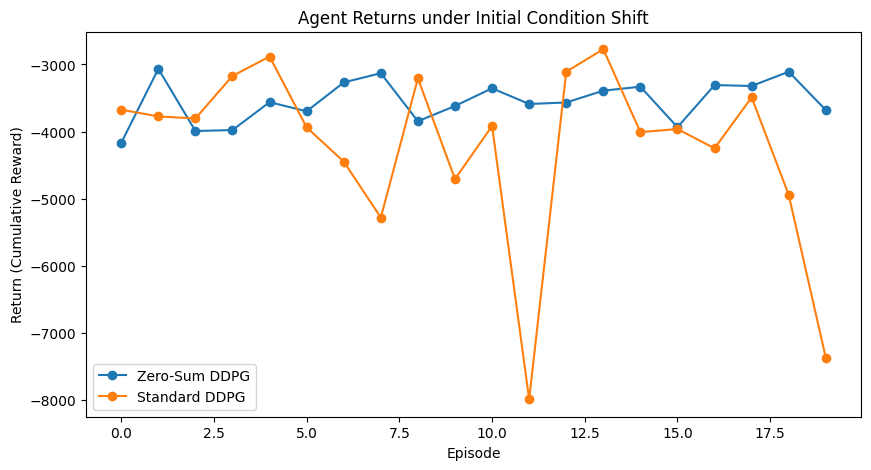

In [25]:

# Number of episodes for evaluation
num_episodes = 20

# Update the agents' environment function to use the initial condition shift
ddpg_zs.env_fn = lambda: make_env_initial_condition_shift(shift_std=.5, obs_noise_std=0.5)
ddpg.env_fn = lambda: make_env_initial_condition_shift(shift_std=.5, obs_noise_std=0.5)

# Evaluate Zero-Sum DDPG and Standard DDPG agents with initial condition shift
returns_zs_initial_shift = evaluate_agent(ddpg_zs, ddpg_zs.env_fn, num_episodes=num_episodes)
returns_std_initial_shift = evaluate_agent(ddpg, ddpg.env_fn, num_episodes=num_episodes)

# Calculate and print average returns
avg_return_zs_initial_shift = np.mean(returns_zs_initial_shift)
avg_return_std_initial_shift = np.mean(returns_std_initial_shift)

print("Zero-Sum DDPG with Initial Condition Shift Average Return:", avg_return_zs_initial_shift)
print("Standard DDPG with Initial Condition Shift Average Return:", avg_return_std_initial_shift)

# Plot the returns for visual comparison
plt.figure(figsize=(10, 5))
plt.plot(returns_zs_initial_shift, marker='o', label='Zero-Sum DDPG')
plt.plot(returns_std_initial_shift, marker='o', label='Standard DDPG')
plt.xlabel('Episode')
plt.ylabel('Return (Cumulative Reward)')
plt.title('Agent Returns under Initial Condition Shift')
plt.legend()
plt.show()


/var/folders/cf/x6zpxdwn2dg40q0c0r418f7c0000gp/T/ipykernel_2041/1068836184.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Zero-Sum DDPG', 'Standard DDPG'])


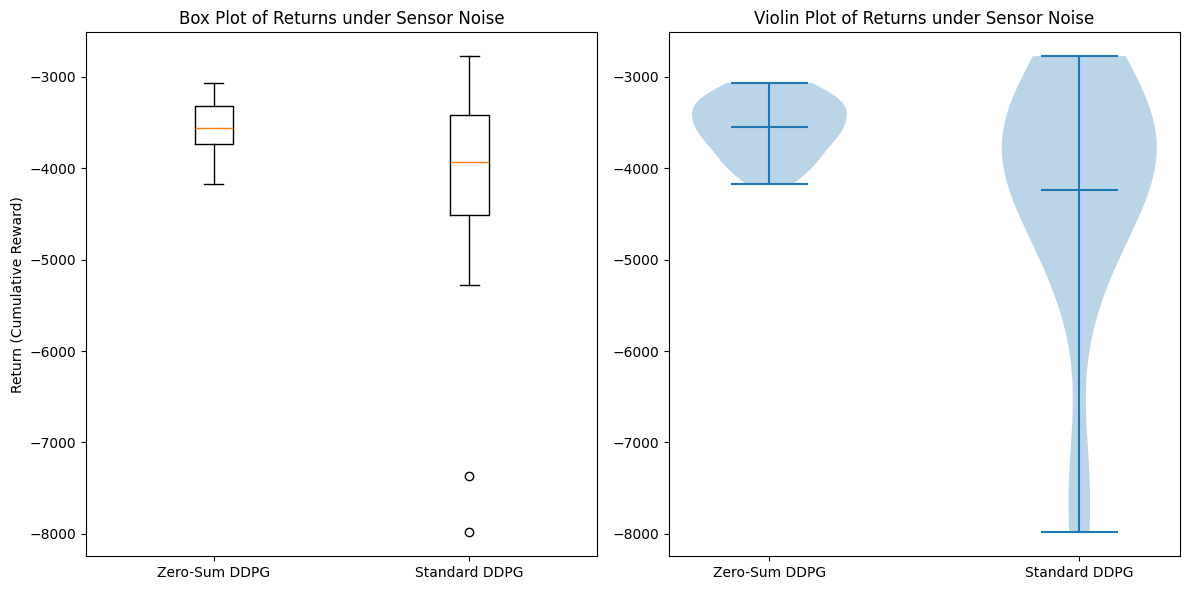

In [26]:
# Assume returns_zs and returns_std are lists of cumulative rewards from multiple episodes
data = [returns_zs_initial_shift, returns_std_initial_shift]

# Create a figure with two subplots side-by-side
plt.figure(figsize=(12, 6))

# Box Plot
plt.subplot(1, 2, 1)
plt.boxplot(data, labels=['Zero-Sum DDPG', 'Standard DDPG'])
plt.title('Box Plot of Returns under Sensor Noise')
plt.ylabel('Return (Cumulative Reward)')

# Violin Plot
plt.subplot(1, 2, 2)
plt.violinplot(data, showmeans=True)
plt.xticks([1, 2], ['Zero-Sum DDPG', 'Standard DDPG'])
plt.title('Violin Plot of Returns under Sensor Noise')

plt.tight_layout()
plt.show()


In [27]:
df  = pd.DataFrame(np.array(data).T, columns=['Zero-Sum DDPG', 'Standard DDPG'])
df.head()

,Zero-Sum DDPG,Standard DDPG
0,-4167.773178,-3674.084651
1,-3066.250546,-3774.840308
2,-3991.503935,-3804.643932
3,-3977.484552,-3171.405663
4,-3562.193290,-2883.204380


In [28]:
# save csv
df.to_csv('evaluation_returns.csv', index=False)